# House Price Prediction with Linear Regression

![](https://i.imgur.com/3sw1fY9.jpg)

In this assignment, you're going to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). We'll follow a step-by-step process to train our model:

1. Download and explore the data
2. Prepare the dataset for training
3. Train a linear regression model
4. Make predictions and evaluate the model

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end and your machine learning model is trained properly without errors. 

**Guidelines**

1. Make sure to run all the code cells in order. Otherwise, you may get errors like `NameError` for undefined variables.
2. Do not change variable names, delete cells, or disturb other existing code. It may cause problems during evaluation.
3. In some cases, you may need to add some code cells or new statements before or after the line of code containing the **???**. 
4. Since you'll be using a temporary online service for code execution, save your work by running `jovian.commit` at regular intervals.
5. Review the "Evaluation Criteria" for the assignment carefully and make sure your submission meets all the criteria.
6. Questions marked **(Optional)** will not be considered for evaluation and can be skipped. They are for your learning.
7. It's okay to ask for help & discuss ideas on the [community forum](https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100), but please don't post full working code, to give everyone an opportunity to solve the assignment on their own.


**Important Links**:

- Make a submission here: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-1-train-your-first-ml-model
- Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100
- Review the following notebooks:
    - https://jovian.ai/aakashns/python-sklearn-linear-regression
    - https://jovian.ai/aakashns/python-sklearn-logistic-regression





## How to Run the Code and Save Your Work


**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [100]:
!pip install jovian scikit-learn --upgrade --quiet

In [101]:
import jovian

In [102]:
jovian.commit(project='python-sklearn-assignment', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

Let's begin by installing the required libraries:

In [103]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet

In [104]:
import matplotlib
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [105]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'

We'll use the `urlretrieve` function from the module [`urllib.request`](https://docs.python.org/3/library/urllib.request.html) to dowload the dataset.

In [106]:
from urllib.request import urlretrieve

In [107]:
urlretrieve(dataset_url, 'house-prices.zip')

('house-prices.zip', <http.client.HTTPMessage at 0x7f58d44ce640>)

The file `housing-prices.zip` has been downloaded. Let's unzip it using the [`zipfile`](https://docs.python.org/3/library/zipfile.html) module.

In [108]:
from zipfile import ZipFile

In [109]:
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')

The dataset is extracted to the folder `house-prices`. Let's view the contents of the folder using the [`os`](https://docs.python.org/3/library/os.html) module.

In [110]:
import os

In [111]:
data_dir = 'house-prices'

In [112]:
os.listdir(data_dir)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

Use the "File" > "Open" menu option to browse the contents of each file. You can also check out the [dataset description](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) on Kaggle to learn more.

We'll use the data in the file `train.csv` for training our model. We can load the for processing using the [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) library.

In [113]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [114]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'house-prices/train.csv'

> **QUESTION 1**: Load the data from the file `train.csv` into a Pandas data frame.

In [115]:
prices_df = pd.read_csv(train_csv_path)

In [116]:
prices_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [117]:
# prices_df['diff_yr'] = prices_df['YrSold'] - prices_df['YearBuilt']
prices_df.insert(loc=79 , column = 'ConstTime', value = prices_df['YrSold'] - prices_df['YearBuilt'])
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,ConstTime,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,5,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,31,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,7,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,91,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,8,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,8,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,32,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,69,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,T

In [118]:
prices_df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [119]:
px.histogram(prices_df,x= 'Utilities',y= 'SalePrice',histfunc='avg')

In [120]:
df_found = prices_df.groupby('Foundation')['SalePrice'].mean().reset_index()

In [121]:
px.histogram(prices_df,x = 'Foundation',y = 'SalePrice', histfunc='avg',color= 'CentralAir', barmode= 'group')

In [122]:
# Identify the input columns (a list of column names)
input_cols = ["MSSubClass","MSZoning","LotArea","GrLivArea","CentralAir","1stFlrSF","2ndFlrSF","ConstTime","GarageArea",
              "BsmtUnfSF","BsmtFinSF1","BedroomAbvGr","SalePrice","GarageCars","ScreenPorch",'Foundation']

In [123]:
px.scatter(prices_df,x = 'ScreenPorch' , y='SalePrice')

In [124]:
px.histogram(prices_df , x = 'GarageCars', y = 'SalePrice', histfunc = 'avg',color= 'CentralAir', barmode= 'group')

In [125]:
px.histogram(prices_df,x='GarageCars',y='SalePrice',histfunc = 'avg' ,color= 'CentralAir', barmode= 'group')

In [126]:
df_air = prices_df.groupby('CentralAir')["SalePrice"].mean().reset_index()
df_air

,CentralAir,SalePrice
0,N,105264.073684
1,Y,186186.709890


In [127]:
px.bar(df_air, x = "CentralAir", y = "SalePrice")

In [128]:
px.histogram(prices_df , x = "BedroomAbvGr" , y = 'SalePrice',histfunc = 'avg',color = 'CentralAir' )
             

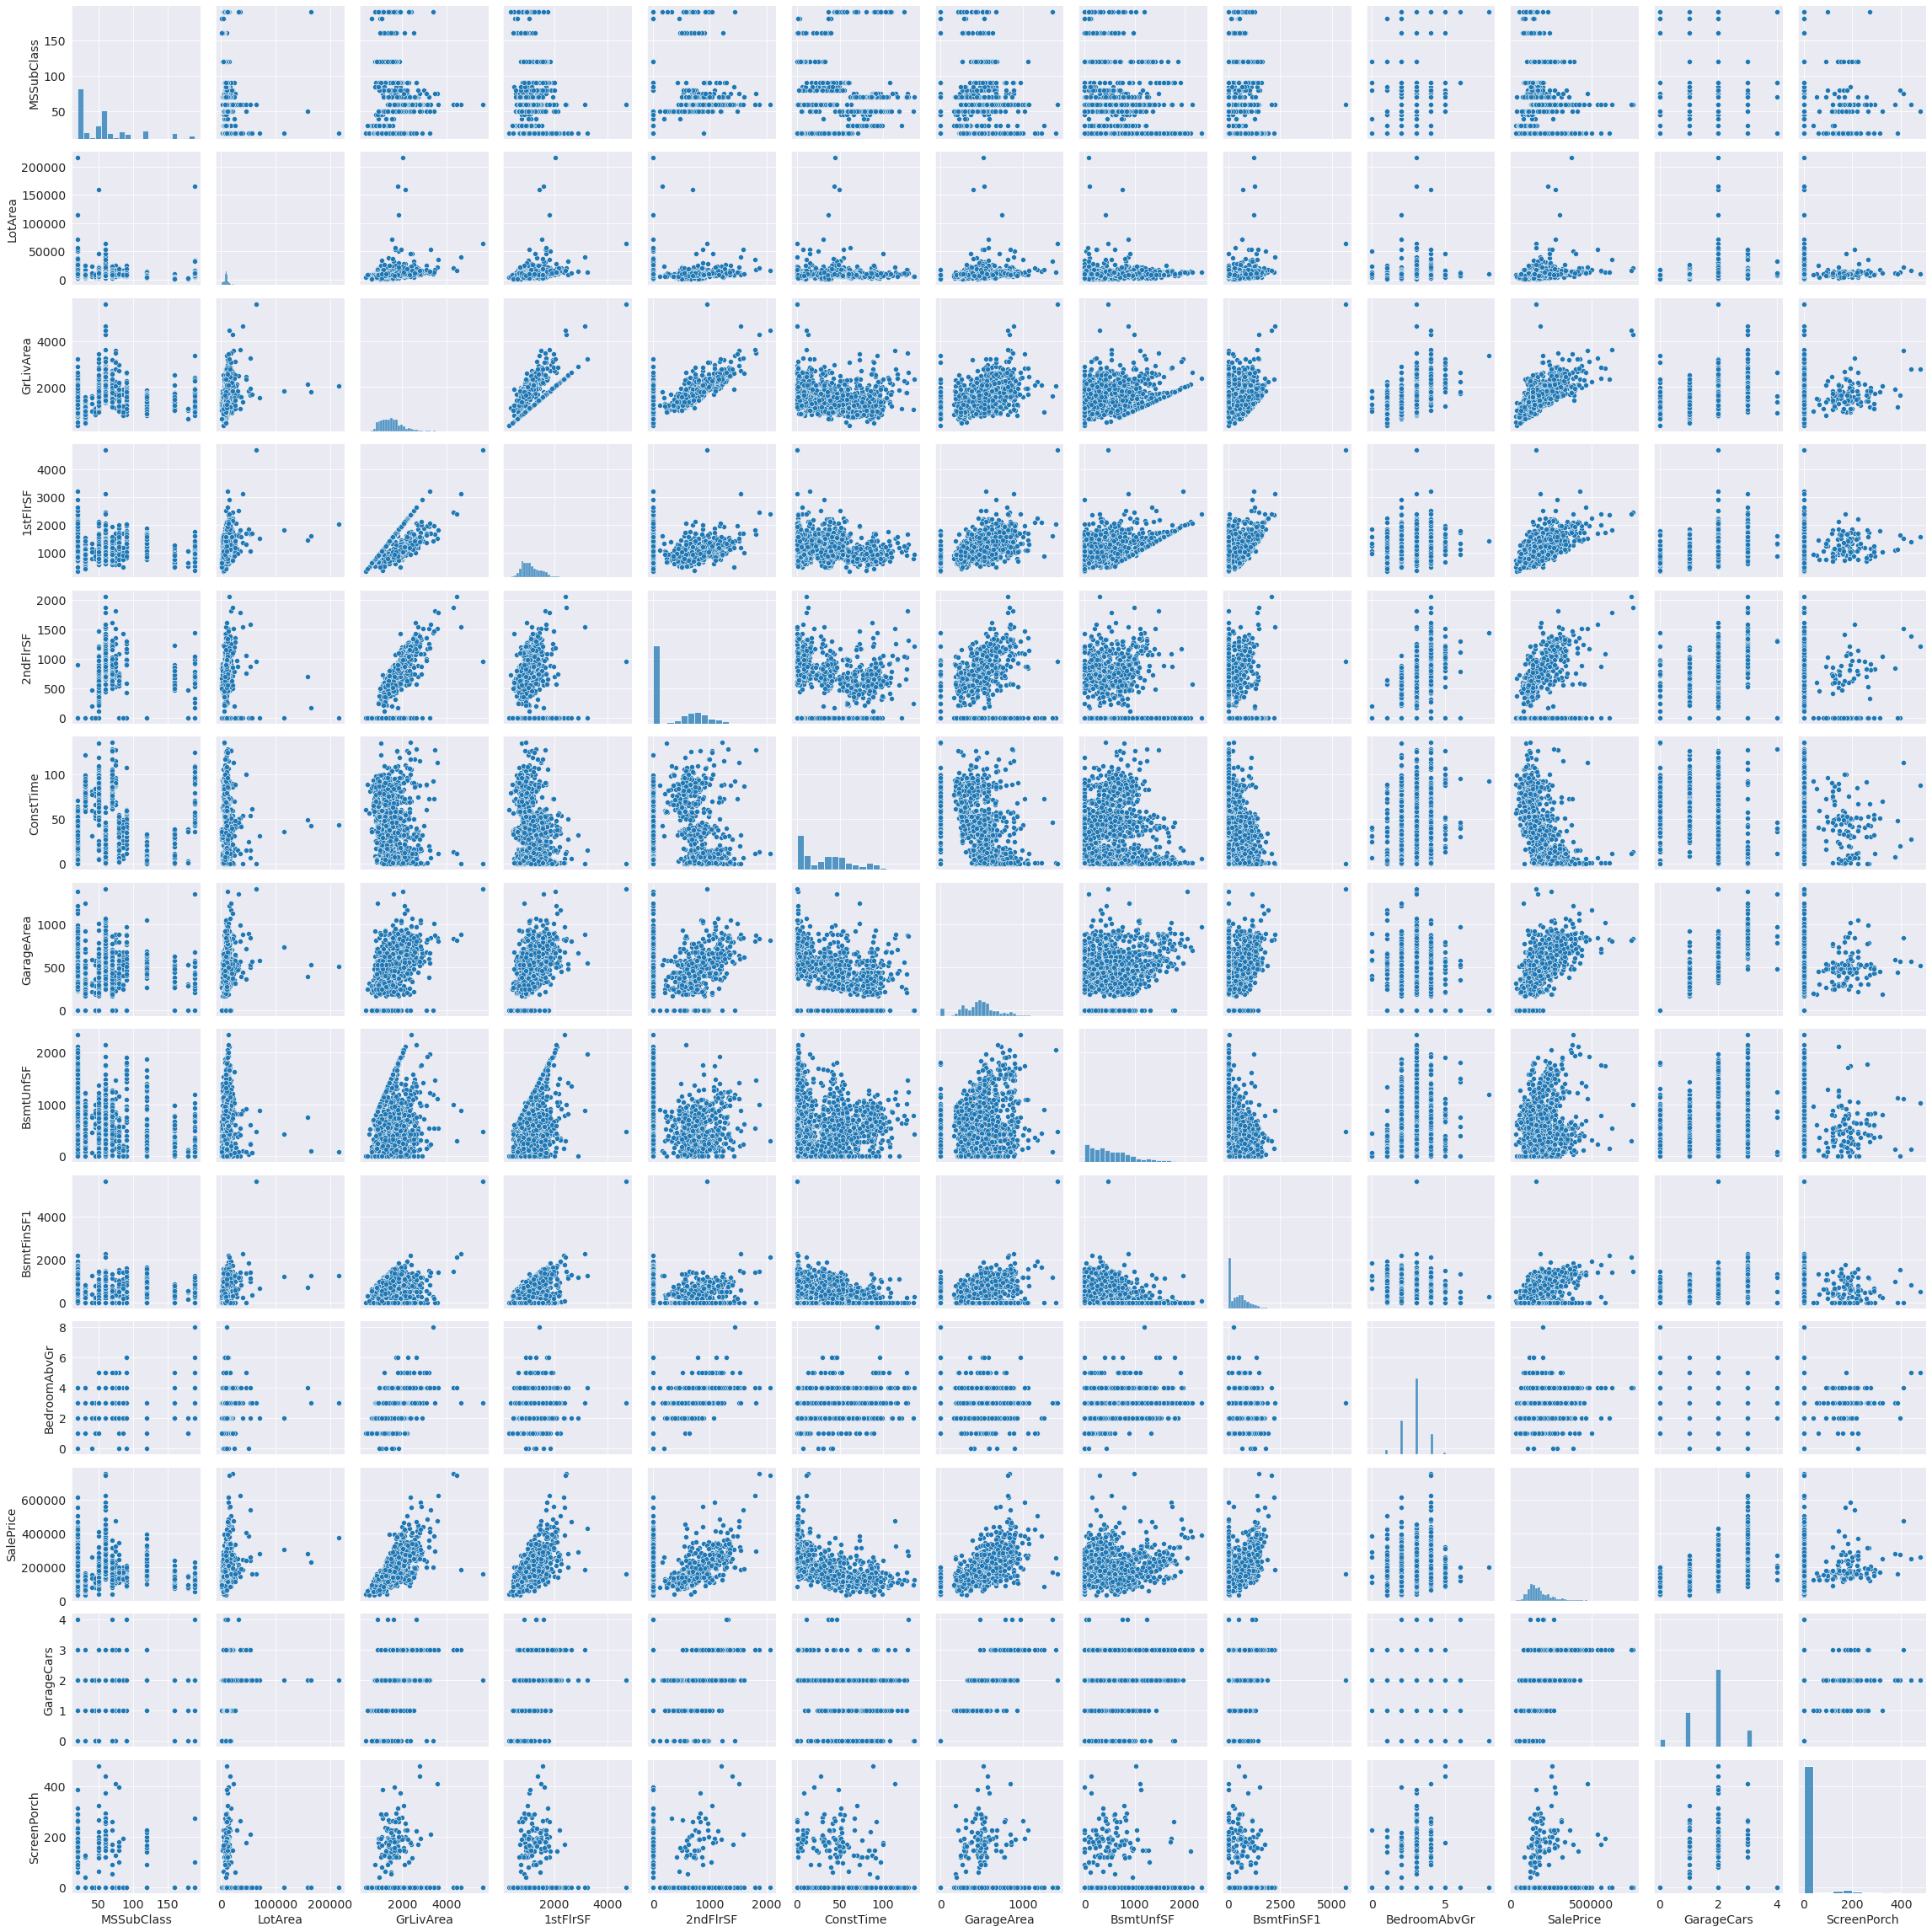

In [129]:
sns.pairplot(prices_df[input_cols])

<AxesSubplot:>

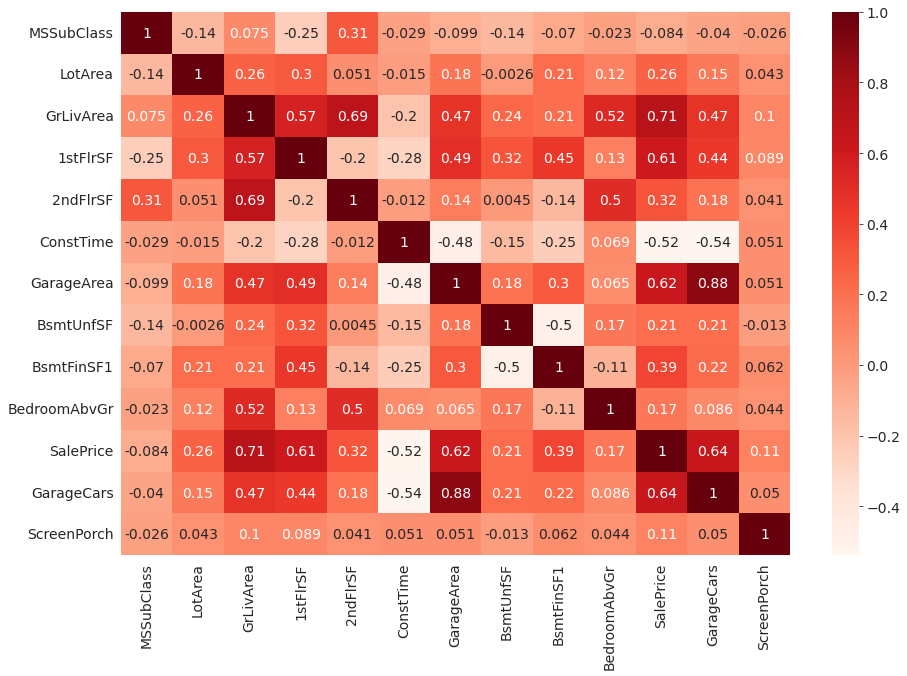

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.heatmap(prices_df[input_cols].corr(), cmap='Reds', annot = True)

In [131]:
central_air_values = {'Y':1 , 'N': 0}
central_air_numeric = prices_df.CentralAir.map(central_air_values)
prices_df.SalePrice.corr(central_air_numeric)

0.2513281638401545

In [132]:
prices_df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [133]:
px.histogram(prices_df,x= 'PavedDrive',y= 'SalePrice',histfunc='avg')

In [134]:
numr = prices_df.select_dtypes(include=['int64','float64']).columns.tolist()
cat = prices_df.select_dtypes(include=['object']).columns.tolist()
print(len(numr)+len(cat))

82


In [135]:
prices_df.select_dtypes(include=['int64','float64'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ConstTime,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,5,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,31,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,7,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,91,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,8,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,8,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,32,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,69,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,60,142125


In [136]:
prices_df[numr].isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
ConstTime          0
SalePrice          0
dtype: int64

Let's explore the columns and data types within the dataset.

In [137]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> **QUESTION 2**: How many rows and columns does the dataset contain? 

In [138]:
n_rows = prices_df.shape[0]

In [139]:
n_rows

1460

In [140]:
n_cols = prices_df.shape[1]

In [141]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1460 rows and 82 columns.


> **(OPTIONAL) QUESTION**: Before training the model, you may want to explore and visualize data from the various columns within the dataset, and study their relationship with the price of the house (using scatter plot and correlations). Create some graphs and summarize your insights using the empty cells below.

In [142]:
# Identify the input columns (a list of column names)
input_cols = ["MSSubClass","MSZoning","LotArea","GrLivArea","CentralAir","1stFlrSF","2ndFlrSF","ConstTime","GarageArea",
              "BsmtUnfSF","BsmtFinSF1","BedroomAbvGr","GarageCars","ScreenPorch",'Foundation',"Neighborhood",'Street','Utilities'
             'ExterCond','KitchenQual','BsmtQual',"FullBath",'GarageQual','BldgType','Condition1','Condition2','HouseStyle',
             'OverallCond','OverallQual','Exterior1st','ExterQual','ExterCond','BsmtCond','TotalBsmtSF','KitchenQual','PavedDrive'],
             

In [143]:
import matplotlib.pyplot as plt
import plotly.express as px

In [144]:
prices_df.SalePrice.corr(prices_df.GarageArea)

0.6234314389183621

In [145]:
prices_df['SalePrice'].corr(prices_df['BsmtFinSF1'])

0.38641980624215316

In [146]:
px.scatter(prices_df,x = 'TotalBsmtSF' , y = "SalePrice",color = "CentralAir" )

In [147]:
px.scatter(prices_df,x = 'GarageArea' , y = "SalePrice",color = "GarageCars" )

In [148]:
px.scatter(prices_df,x = 'BsmtUnfSF' , y = "SalePrice",color = "CentralAir" )

In [149]:
px.scatter(prices_df,x = 'BsmtFinSF1' , y = "SalePrice",color = "CentralAir" )

In [150]:

px.histogram(prices_df , x = 'BedroomAbvGr' ,  color = 'CentralAir')

In [151]:
px.scatter(prices_df,x = '2ndFlrSF' , y = "SalePrice",color = "CentralAir" )

In [152]:
px.scatter(prices_df,x = '1stFlrSF' , y = "SalePrice",color = "CentralAir" )

In [153]:
px.scatter(prices_df,x = 'GrLivArea' , y = "SalePrice",color = "GarageCars" )

In [154]:
px.scatter(prices_df,x = 'ConstTime' , y = "SalePrice",color = "CentralAir" )


In [155]:
px.scatter(prices_df,x = 'PoolArea' , y = "SalePrice" )

Let's save our work before continuing.

In [156]:
import jovian

In [157]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

## Step 2 - Prepare the Dataset for Training

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


### Identify Inputs and Targets

While the dataset contains 81 columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

In [158]:
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,ConstTime,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,5,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,31,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,7,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,91,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,8,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,8,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,32,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,69,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,T

> **QUESTION 3**: Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [159]:
# Identify the input columns (a list of column names)
input_cols = ["MSSubClass","MSZoning","LotArea","GrLivArea","CentralAir","1stFlrSF","2ndFlrSF","ConstTime","GarageArea",
              "BsmtUnfSF","BsmtFinSF1","BedroomAbvGr","GarageCars","ScreenPorch",'Foundation',"Neighborhood",'Street','Utilities',
             'ExterCond','KitchenQual','BsmtQual',"FullBath",'GarageQual','BldgType','Condition1','Condition2','HouseStyle',
             'OverallCond','OverallQual','Exterior1st','ExterQual','BsmtCond','TotalBsmtSF','PavedDrive']

In [160]:
# Identify the name of the target column (a single string, not a list)
target_col = "SalePrice"

In [161]:
print((input_cols))

['MSSubClass', 'MSZoning', 'LotArea', 'GrLivArea', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'ConstTime', 'GarageArea', 'BsmtUnfSF', 'BsmtFinSF1', 'BedroomAbvGr', 'GarageCars', 'ScreenPorch', 'Foundation', 'Neighborhood', 'Street', 'Utilities', 'ExterCond', 'KitchenQual', 'BsmtQual', 'FullBath', 'GarageQual', 'BldgType', 'Condition1', 'Condition2', 'HouseStyle', 'OverallCond', 'OverallQual', 'Exterior1st', 'ExterQual', 'BsmtCond', 'TotalBsmtSF', 'PavedDrive']


In [162]:
len(input_cols)

34

In [163]:
print(target_col)

SalePrice


Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [164]:
inputs_df = prices_df[input_cols].copy()

In [165]:
targets = prices_df[target_col]

In [166]:
inputs_df

,MSSubClass,MSZoning,LotArea,GrLivArea,CentralAir,1stFlrSF,2ndFlrSF,ConstTime,GarageArea,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,GarageCars,ScreenPorch,Foundation,Neighborhood,Street,Utilities,ExterCond,KitchenQual,BsmtQual,FullBath,GarageQual,BldgType,Condition1,Condition2,HouseStyle,OverallCond,OverallQual,Exterior1st,ExterQual,BsmtCond,TotalBsmtSF,PavedDrive
0,60,RL,8450,1710,Y,856,854,5,548,150,706,3,2,0,PConc,CollgCr,Pave,AllPub,TA,Gd,Gd,2,TA,1Fam,Norm,Norm,2Story,5,7,VinylSd,Gd,TA,856,Y
1,20,RL,9600,1262,Y,1262,0,31,460,284,978,3,2,0,CBlock,Veenker,Pave,AllPub,TA,TA,Gd,2,TA,1Fam,Feedr,Norm,1Story,8,6,MetalSd,TA,TA,1262,Y
2,60,RL,11250,1786,Y,920,866,7,608,434,486,3,2,0,PConc,CollgCr,Pave,AllPub,TA,Gd,Gd,2,TA,1Fam,Norm,Norm,2Story,5,7,VinylSd,Gd,TA,920,Y
3,70,RL,9550,1717,Y,961,756,91,642,540,216,3,3,0,BrkTil,Crawfor,Pave,AllPub,TA,Gd,TA,1,TA,1Fam,Norm,Norm,2Story,5,7,Wd Sdng,TA,Gd,756,Y
4,60,RL,14260,2198,Y,1145,1053,8,836,490,655,4,3,0,PConc,NoRidge,Pave,AllPub,TA,Gd,Gd,2,TA,1Fam,Norm,Norm,2Story,5,8,VinylSd,Gd,TA,1145,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,1647,Y,953,694,8,460,953,0,3,2,0,PConc,Gilbert,Pave,AllPub,TA,TA,Gd,2,TA,1Fam,Norm,Norm,2Story,5,6,VinylSd,TA,TA,953,Y
1456,20,RL,13175,2073,Y,2073,0,32,500,589,790,3,2,0,CBlock,NWAmes,Pave,AllPub,TA,TA,Gd,2,TA,1Fam,Norm,Norm,1Story,6,6,Plywood,TA,TA,1542,Y
1457,70,RL,9042,2340,Y,1188,1152,69,252,877,275,4,1,0,Stone,Crawfor,Pave,AllPub,Gd,Gd,TA,2,TA,1Fam,Norm,Norm,2Story,9,7,CemntBd,Ex,Gd,1152,Y
1458,20,RL,9717,1078,Y,1078,0,60,240,0,49,2,1,0,CBlock,NAmes,Pave,AllPub,TA,Gd,TA,1,TA,1Fam,Norm,Norm,1Story,6,5,MetalSd,TA,TA,1078,Y


In [167]:
targets

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Let's save our work before continuing.

In [168]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

### Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

> **QUESTION 4**: Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas). 

In [169]:
import numpy as np

In [170]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['MSSubClass',
 'LotArea',
 'GrLivArea',
 '1stFlrSF',
 '2ndFlrSF',
 'ConstTime',
 'GarageArea',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'BedroomAbvGr',
 'GarageCars',
 'ScreenPorch',
 'FullBath',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF']

In [171]:
categorical_cols = inputs_df.select_dtypes(include=['object']).columns.tolist()

In [172]:
inputs_df[categorical_cols]

,MSZoning,CentralAir,Foundation,Neighborhood,Street,Utilities,ExterCond,KitchenQual,BsmtQual,GarageQual,BldgType,Condition1,Condition2,HouseStyle,Exterior1st,ExterQual,BsmtCond,PavedDrive
0,RL,Y,PConc,CollgCr,Pave,AllPub,TA,Gd,Gd,TA,1Fam,Norm,Norm,2Story,VinylSd,Gd,TA,Y
1,RL,Y,CBlock,Veenker,Pave,AllPub,TA,TA,Gd,TA,1Fam,Feedr,Norm,1Story,MetalSd,TA,TA,Y
2,RL,Y,PConc,CollgCr,Pave,AllPub,TA,Gd,Gd,TA,1Fam,Norm,Norm,2Story,VinylSd,Gd,TA,Y
3,RL,Y,BrkTil,Crawfor,Pave,AllPub,TA,Gd,TA,TA,1Fam,Norm,Norm,2Story,Wd Sdng,TA,Gd,Y
4,RL,Y,PConc,NoRidge,Pave,AllPub,TA,Gd,Gd,TA,1Fam,Norm,Norm,2Story,VinylSd,Gd,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Y,PConc,Gilbert,Pave,AllPub,TA,TA,Gd,TA,1Fam,Norm,Norm,2Story,VinylSd,TA,TA,Y
1456,RL,Y,CBlock,NWAmes,Pave,AllPub,TA,TA,Gd,TA,1Fam,Norm,Norm,1Story,Plywood,TA,TA,Y
1457,RL,Y,Stone,Crawfor,Pave,AllPub,Gd,Gd,TA,TA,1Fam,Norm,Norm,2Story,CemntBd,Ex,Gd,Y
1458,RL,Y,CBlock,NAmes,Pave,AllPub,TA,Gd,TA,TA,1Fam,Norm,Norm,1Story,MetalSd,TA,TA,Y


In [173]:
print(list(numeric_cols))

['MSSubClass', 'LotArea', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'ConstTime', 'GarageArea', 'BsmtUnfSF', 'BsmtFinSF1', 'BedroomAbvGr', 'GarageCars', 'ScreenPorch', 'FullBath', 'OverallCond', 'OverallQual', 'TotalBsmtSF']


In [174]:
print(list(categorical_cols))

['MSZoning', 'CentralAir', 'Foundation', 'Neighborhood', 'Street', 'Utilities', 'ExterCond', 'KitchenQual', 'BsmtQual', 'GarageQual', 'BldgType', 'Condition1', 'Condition2', 'HouseStyle', 'Exterior1st', 'ExterQual', 'BsmtCond', 'PavedDrive']


In [175]:
len(categorical_cols)


18

In [176]:
inputs_df[numeric_cols].isna().sum()

MSSubClass      0
LotArea         0
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
ConstTime       0
GarageArea      0
BsmtUnfSF       0
BsmtFinSF1      0
BedroomAbvGr    0
GarageCars      0
ScreenPorch     0
FullBath        0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
dtype: int64

In [177]:
inputs_df[categorical_cols].isna().sum()

MSZoning         0
CentralAir       0
Foundation       0
Neighborhood     0
Street           0
Utilities        0
ExterCond        0
KitchenQual      0
BsmtQual        37
GarageQual      81
BldgType         0
Condition1       0
Condition2       0
HouseStyle       0
Exterior1st      0
ExterQual        0
BsmtCond        37
PavedDrive       0
dtype: int64

Let's save our work before continuing.

In [178]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

### Impute Numerical Data

Some of the numeric columns in our dataset contain missing values (`nan`).

In [179]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [180]:
missing_counts = inputs_df[categorical_cols].isna().sum()
missing_counts[missing_counts > 0]

BsmtQual      37
GarageQual    81
BsmtCond      37
dtype: int64

Machine learning models can't work with missing data. The process of filling missing values is called [imputation](https://scikit-learn.org/stable/modules/impute.html).

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.


In [181]:
from sklearn.impute import SimpleImputer

> **QUESTION 5**: Impute (fill) missing values in the numeric columns of `inputs_df` using a `SimpleImputer`. 
>
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C88).

In [182]:
# 1. Create the imputer
imputer = SimpleImputer(strategy='most_frequent')

In [183]:
# 2. Fit the imputer to the numeric colums
imputer.fit(inputs_df[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [184]:
# 3. Transform and replace the numeric columns
inputs_df[categorical_cols] = imputer.transform(inputs_df[categorical_cols])

After imputation, none of the numeric columns should contain any missing values.

In [185]:
missing_counts = inputs_df[categorical_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

Let's save our work before continuing.

In [186]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

### Scale Numerical Values

The numeric columns in our dataset have varying ranges. 

In [187]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,ConstTime,GarageArea,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,GarageCars,ScreenPorch,FullBath,OverallCond,OverallQual,TotalBsmtSF
min,20.0,1300.0,334.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
max,190.0,215245.0,5642.0,4692.0,2065.0,136.0,1418.0,2336.0,5644.0,8.0,4.0,480.0,3.0,9.0,10.0,6110.0


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


> **QUESTION 6**: Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.
>
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C104).

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
# Create the scaler
scaler = MinMaxScaler()

In [190]:
# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

MinMaxScaler()

In [191]:
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

After scaling, the ranges of all numeric columns should be $(0, 1)$.

In [192]:
inputs_df[numeric_cols].describe()

,MSSubClass,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,ConstTime,GarageArea,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,GarageCars,ScreenPorch,FullBath,OverallCond,OverallQual,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.043080,0.222582,0.190139,0.168035,0.268735,0.333554,0.242826,0.078604,0.358305,0.441781,0.031377,0.521689,0.571918,0.566591,0.173065
std,0.248827,0.046653,0.098998,0.088708,0.211394,0.222428,0.150779,0.189155,0.080811,0.101972,0.186829,0.116161,0.183639,0.139100,0.153666,0.071801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029229,0.149868,0.125746,0.000000,0.058824,0.235896,0.095462,0.000000,0.250000,0.250000,0.000000,0.333333,0.500000,0.444444,0.130237
50%,0.176471,0.038227,0.212886,0.172786,0.000000,0.257353,0.338505,0.204409,0.067948,0.375000,0.500000,0.000000,0.666667,0.500000,0.555556,0.162275
75%,0.294118,0.048150,0.271807,0.242600,0.352542,0.397059,0.406206,0.345890,0.126196,0.375000,0.500000,0.000000,0.666667,0.625000,0.666667,0.212480
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,ConstTime,GarageArea,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,GarageCars,ScreenPorch,FullBath,OverallCond,OverallQual,TotalBsmtSF
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [194]:
inputs_df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   CentralAir    1460 non-null   object
 2   Foundation    1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   Street        1460 non-null   object
 5   Utilities     1460 non-null   object
 6   ExterCond     1460 non-null   object
 7   KitchenQual   1460 non-null   object
 8   BsmtQual      1460 non-null   object
 9   GarageQual    1460 non-null   object
 10  BldgType      1460 non-null   object
 11  Condition1    1460 non-null   object
 12  Condition2    1460 non-null   object
 13  HouseStyle    1460 non-null   object
 14  Exterior1st   1460 non-null   object
 15  ExterQual     1460 non-null   object
 16  BsmtCond      1460 non-null   object
 17  PavedDrive    1460 non-null   object
dtypes: object(18)
memory usage: 205.4+ KB


Let's save our work before continuing.

In [195]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

### Encode Categorical Columns

Our dataset contains several categorical columns, each with a different number of categories.

In [196]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood    25
Exterior1st     15
Condition1       9
HouseStyle       8
Condition2       8
Foundation       6
MSZoning         5
BldgType         5
GarageQual       5
ExterCond        5
BsmtQual         4
KitchenQual      4
ExterQual        4
BsmtCond         4
PavedDrive       3
CentralAir       2
Utilities        2
Street           2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

> **QUESTION 7**: Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category
> 
> *Hint*: See [this notebook](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C122).

In [197]:
from sklearn.preprocessing import OneHotEncoder

In [198]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [199]:
# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [200]:
encoder.get_feature_names_out(categorical_cols)

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'CentralAir_N', 'CentralAir_Y', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl',
       'Street_Pave', 'Utilities_AllPub', 'Utiliti

In [201]:
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



116

In [202]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



The new one-hot category columns should now be added to `inputs_df`.

In [203]:
inputs_df

,MSSubClass,MSZoning,LotArea,GrLivArea,CentralAir,1stFlrSF,2ndFlrSF,ConstTime,GarageArea,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,GarageCars,ScreenPorch,Foundation,Neighborhood,Street,Utilities,ExterCond,KitchenQual,BsmtQual,FullBath,GarageQual,BldgType,Condition1,Condition2,HouseStyle,OverallCond,OverallQual,Exterior1st,ExterQual,BsmtCond,TotalBsmtSF,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,CentralAir_N,CentralAir_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0.235294,RL,0.033420,0.259231,Y,0.119780,0.413559,0.036765,0.386460,0.064212,0.125089,0.375,0.50,0.0,PConc,CollgCr,Pave,AllPub,TA,Gd,Gd,0.666667,TA,1Fam,Norm,Norm,2Story,0.500,0.666667,VinylSd,Gd,TA,0.140098,Y,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000000,RL,0.038795,0.174830,Y,0.212942,0.000000,0.227941,0.324401,0.121575,0.173281,0.375,0.50,0.0,CBlock,Veenker,Pave,AllPub,TA,TA,Gd,0.666667,TA,1Fam,Feedr,Norm,1Story,0.875,0.555556,MetalSd,TA,TA,0.206547,Y,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.235294,RL,0.046507,0.273549,Y,0.134465,0.419370,0.051471,0.428773,0.185788,0.086109,0.375,0.50,0.0,PConc,CollgCr,Pave,AllPub,TA,Gd,Gd,0.666667,TA,1Fam,Norm,Norm,2Story,0.500,0.666667,VinylSd,Gd,TA,0.150573,Y,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Let's save our work before continuing.

In [204]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

### Training and Validation Set

Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers. 

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [207]:
train_inputs

,MSSubClass,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,ConstTime,GarageArea,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,GarageCars,ScreenPorch,FullBath,OverallCond,OverallQual,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,CentralAir_N,CentralAir_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
1023,0.588235,0.008797,0.220422,0.268472,0.000000,0.022059,0.308181,0.569349,0.002835,0.250,0.50,0.0,0.666667,0.500,0.666667,0.220295,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
810,0.000000,0.041319,0.183685,0.223726,0.000000,0.235294,0.341326,0.000000,0.117470,0.375,0.50,0.0,0.333333,0.625,0.555556,0.170213,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1384,0.176471,0.036271,0.174077,0.083525,0.271186,0.514706,0.197461,0.152397,0.036145,0.250,0.25,0.0,0.333333,0.500,0.555556,0.091653,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
626,0.000000,0.051611,0.204974,0.249656,0.000000,0.345588,0.201693,0.418664,0.000000,0.375,0.2

In [208]:
train_targets

1023    191000
810     181000
1384    105000
626     139900
813     157900
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64

In [209]:
val_inputs

,MSSubClass,LotArea,GrLivArea,1stFlrSF,2ndFlrSF,ConstTime,GarageArea,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,GarageCars,ScreenPorch,FullBath,OverallCond,OverallQual,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,CentralAir_N,CentralAir_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
892,0.000000,0.033252,0.138282,0.168426,0.000000,0.316176,0.186178,0.169521,0.117470,0.375,0.25,0.0,0.333333,0.875,0.555556,0.173322,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1105,0.235294,0.051209,0.431047,0.267554,0.543341,0.117647,0.502116,0.184503,0.182849,0.375,0.50,0.0,0.666667,0.500,0.777778,0.239444,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
413,0.058824,0.035804,0.130746,0.159247,0.000000,0.610294,0.253879,0.431507,0.000000,0.250,0.50,0.0,0.333333,0.625,0.444444,0.164975,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
522,0.176471,0.017294,0.250565,0.153740,0.319613,0.433824,0.296192,0.258990,0.070695,0.375,0.50

In [210]:
val_targets

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
988     195000
243     120000
1342    228500
1057    248000
1418    124000
Name: SalePrice, Length: 365, dtype: int64

Let's save our work before continuing.

In [211]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

## Step 3 - Train a Linear Regression Model

We're now ready to train the model. Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. Learn more about ridge regression here: https://www.youtube.com/watch?v=Q81RR3yKn30

> **QUESTION 8**: Create and train a linear regression model using the `Ridge` class from `sklearn.linear_model`.

In [212]:
from sklearn.linear_model import Ridge

In [213]:
# Create the model
model = Ridge(alpha=1)

In [214]:
# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

Ridge(alpha=1)

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

Let's save our work before continuing.

In [215]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hussainashar95/python-sklearn-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hussainashar95/python-sklearn-assignment


'https://jovian.ai/hussainashar95/python-sklearn-assignment'

## Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

> **QUESTION 9**: Generate predictions and compute the RMSE loss for the training and validation sets. 
> 
> *Hint*: Use the `mean_squared_error` with the argument `squared=False` to compute RMSE loss.

In [216]:
from sklearn.metrics import mean_squared_error

In [217]:
train_preds = model.predict(train_inputs)

In [218]:
train_preds

array([178463.66737571, 170624.79086553, 111896.89880487, ...,
       121028.60361699, 182337.71029792, 194440.91750253])

In [219]:
train_rmse = mean_squared_error(train_targets,train_preds,squared=False)

In [220]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 27916.708416643956.


In [221]:
val_preds = model.predict(val_inputs)

In [222]:
val_preds

array([146941.52023044, 346409.06070979, 102629.56698837, 175967.30425882,
       316441.31194413,  71540.28751145, 242229.52206431, 133792.59583578,
        65576.28896122, 143912.18066162, 154774.08774199, 115871.28534995,
       102044.22486117, 235514.46979859, 175377.6302843 , 134811.02575732,
       198913.7315942 , 133516.67077514, 125076.11938359, 216437.25147957,
       165757.96799741, 224085.90603359, 183706.49695658, 128097.23878751,
       205594.34317022, 149148.89624425, 192965.49448114, 117888.12648743,
       170926.82163558, 211339.99174334, 142353.67424883, 275175.05233222,
       257672.98044882, 109821.12512008, 245747.61379634, 141424.55947535,
       143394.1332891 , 214821.5821954 , 333312.53427464, 126979.47562686,
       126855.82996622, 224045.26426204, 116967.24730237, 353911.22375243,
       136476.87675172, 137617.17334889, 117542.54884766, 129250.62926861,
       400245.5834049 , 123596.24166558, 125526.83952424, 193487.97120051,
       109227.05320589, 2

In [223]:
val_rmse = mean_squared_error(val_targets,val_preds,squared=False)

In [224]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 29372.48811626734.


In [225]:
error = []
para = [i*0.01 for i in range(1,11) ]
for i in para:
    model = Ridge(alpha=i)
    model.fit(train_inputs,train_targets)
    train_preds= model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets,val_preds,squared=False)
    frame = [i,train_rmse,val_rmse]
    error.append(frame)
pd.DataFrame(error,columns = ['alpha','training err','Validation err'])    

,alpha,training err,Validation err
0,0.01,27591.280695,29036.140299
1,0.02,27596.171714,29011.054259
2,0.03,27600.444320,28997.905042
3,0.04,27604.052879,28990.375855
4,0.05,27607.162804,28985.939411
5,0.06,27609.923846,28983.399857
6,0.07,27612.446890,28982.121164
7,0.08,27614.810905,28981.734366
8,0.09,27617.072009,28982.010469
9,0.10,27619.270398,28982.799414


### Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

> **QUESTION 10**: Identify the weights (or coefficients) assigned to for different features by the model.
> 
> *Hint:* Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [226]:
weights = model.coef_
weights

array([  -2249.59596295,  103860.16074083,  163742.09035682,
         68059.71470089,   72761.7626762 ,  -37878.62857728,
        -17779.44368793,  -21959.79863528,   34877.03278499,
        -10766.24427625,   54842.20728391,   23498.72995451,
         13344.18498895,   41652.11008084,   96920.30270253,
         28738.36904424,   -7295.5247711 ,    5603.89421614,
         -3173.25146217,    2348.57214602,    2516.30987113,
         -1558.94135069,    1558.9413507 ,    1636.19710179,
          6428.66065338,    9299.94963057,  -11177.56821975,
         10874.05090307,  -17061.29006914,    7813.32008574,
         -2082.85890039,    9454.18980696,  -10202.51439649,
          4560.18121972,   -4842.1508569 ,   11977.68075433,
        -21817.16255692,  -10283.16714187,  -19659.0414344 ,
         -4904.24769186,  -20332.77767554,  -18927.44803113,
          7081.42737016,  -18310.61280049,   44522.73739053,
         28865.75752199,  -20384.0515907 ,  -11696.16909917,
        -16598.35194294,

Let's create a dataframe to view the weight assigned to each column.

In [227]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [228]:
weights_df

,columns,weight
2,GrLivArea,163742.090357
1,LotArea,103860.160741
14,OverallQual,96920.302703
4,2ndFlrSF,72761.762676
3,1stFlrSF,68059.714701
10,GarageCars,54842.207284
51,Neighborhood_StoneBr,46175.547001
44,Neighborhood_NoRidge,44522.737391
71,GarageQual_Ex,44502.588657
13,OverallCond,41652.110081


Can you tell which columns have the greatest impact on the price of the house?

### Making Predictions

The model can be used to make predictions on new inputs using the following helper function:

In [229]:
import numpy as np
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[categorical_cols] = imputer.transform(input_df[categorical_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)

In [230]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 15000,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal','ConstTime':100}

In [231]:
predicted_price = predict_input(sample_input)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [232]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $[95333.99460546]


Change the values in `sample_input` above and observe the effects on the predicted price. 

### Saving the model

Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [233]:
import joblib

In [234]:
house_price_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [235]:
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']

Congratulations on training and evaluating your first machine learning model using `scikit-learn`! Let's save our work before continuing. We'll include the saved model as an output.

In [ ]:
jovian.commit(outputs=['house_price_predictor.joblib'])

<IPython.core.display.Javascript object>

## Make Submission

To make a submission, just execute the following cell:

In [ ]:
jovian.submit('zerotogbms-a1')

You can also submit your Jovian notebook link on the assignment page: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-1-train-your-first-ml-model

Make sure to review the evaluation criteria carefully. You can make any number of submissions, and only your final submission will be evalauted.

Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-1/100
